<a href="https://colab.research.google.com/github/BrianM50/MAT-422/blob/main/Section_3_7(Neural_Networks).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from numpy import exp, array, append, sum, dot, log10


print('Artificial neural networks is a collection of connected layers of units or nodes to loosely model the neurons in a biological brain.')
print('Given an input or set of inputs, the activation function of a node defines the output of that node.')

Artificial neural networks is a collection of connected layers of units or nodes to loosely model the neurons in a biological brain.
Given an input or set of inputs, the activation function of a node defines the output of that node.


The sigmoid function is a mathmatical function that is used in binary classification and has a characteristic "S"-shaped curve.


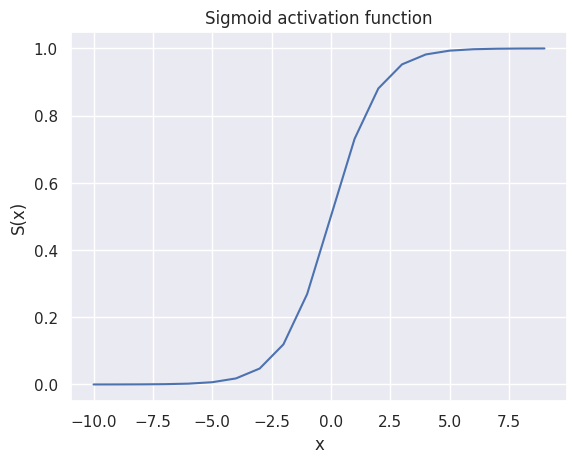

In [2]:
print('The sigmoid function is a mathmatical function that is used in binary classification and has a characteristic "S"-shaped curve.')

#Sigmoid activation function
def Sigmoid(x):
    return 1 / (1 + exp(-x))

for i in array([range(-10, 10)]):
  x = append(array([]), i)
  plt.plot(x, Sigmoid(x))
  plt.title("Sigmoid activation function")
  plt.xlabel("x")
  plt.ylabel("S(x)")

In [3]:
print('The softmax activation function is used for multi-class classification, meaning that it will calculate the porbabilities of each target class ovar all possible taget classes')

#Softmax activation function
def Softmax(x):
    return exp(x) / sum(exp(x))

x = array([1, 2, 3, 4, 5, 6])

Softmax(x)

The softmax activation function is used for multi-class classification, meaning that it will calculate the porbabilities of each target class ovar all possible taget classes


array([0.00426978, 0.01160646, 0.03154963, 0.08576079, 0.23312201,
       0.63369132])

The ReLU function, which stands for Rectified Linear Units, allows for faster and more effective training of deep neaural architactives on large and complex datatsets compared to other functions.
This function has an output of 0 if the input is less than 0, and raw output otherwise.


Text(0, 0.5, 'ReLU(x)')

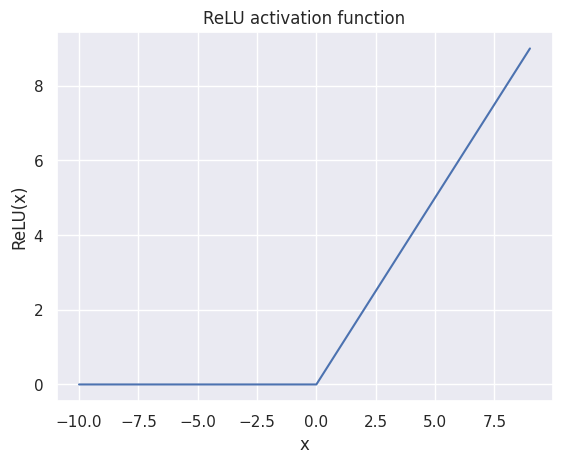

In [4]:
print('The ReLU function, which stands for Rectified Linear Units, allows for faster and more effective training of deep neaural architactives on large and complex datatsets compared to other functions.')
print('This function has an output of 0 if the input is less than 0, and raw output otherwise.')

#ReLU activation function
def ReLU(x):
    return x * (x>0)

x = array(range(-10, 10))
plt.plot(x, ReLU(x))
plt.title("ReLU activation function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")

In [5]:
print('The process of feeding the Neural Network with a set of inputs to get their dot products with their weights then feeding the latter to an activation function and comparinhg its numerical value to the actual output called "the ground truth" is known as Forward Propagation.')

#input
i = array([[0.1, 0.4, 0.5]])

#Initial weights of the first and second layer
wij = array([[0.1, 0.2, 0.4, 0.3],
             [0.5, 0.4, 0.7, 0.9],
             [0.2, 0.6, 0.3, 0.8]])
wjk = array([[0.2],
             [0.3],
             [0.6],
             [0.1]])

#Calculate the dot product of the inputs and weights of the hidden layer
zij = dot(i, wij)
#Apply the ReLU function
aij = ReLU(zij)
#Dot product of the inputs in hidden layer after activation and weights of the second layer
zjk = dot(aij, wjk)
#Apply the Sigmoid activation function
ajk = Sigmoid(zjk)
print('The predicted output is', ajk)

The process of feeding the Neural Network with a set of inputs to get their dot products with their weights then feeding the latter to an activation function and comparinhg its numerical value to the actual output called "the ground truth" is known as Forward Propagation.
The predicted output is [[0.63807065]]


In [6]:
print('Cross-entropy loss is used to measure the preformance of a classification model whose output is a probability between 0 and 1.')

#Cross-entropy error function
def Crossentropyerror(a, y):
    return - sum(y * log10(a) + (1 - y) * log10(1 - a))

#Output of the neural network
a = ajk
#Ground truth
y = array([[1]])
c = Crossentropyerror(a, y)
print('The cross-entropy error is', c)

Cross-entropy loss is used to measure the preformance of a classification model whose output is a probability between 0 and 1.
The cross-entropy error is 0.19513122954797735


In [7]:
print('In artifical neural networks backpropagation is a method used to calculate a gradient that is needed in the calculation of the weights to be used in the network.')

#Derivative of the Sigmoid activation function
def SigmoidDerivative(x):
    return Sigmoid(x) * (1 - Sigmoid(x))

#Derivative of the ReLU activation function
def ReLUDerivative(x):
    return 1. * (x > 0)

In artifical neural networks backpropagation is a method used to calculate a gradient that is needed in the calculation of the weights to be used in the network.


In [8]:
#Backprogation from the output layer to hidden layer
dljk = -y/ajk + (1-y)/(1-ajk)
dajk = SigmoidDerivative(zjk)
dzjk = aij
gradientjk = dot(dzjk.T, dljk * dajk)
print('Gradientjk:')
print(gradientjk, '\n')

#Backpropagation from the hidden layer to the output layer
dlij = dot(dajk * dljk, wjk.T)
daij = ReLUDerivative(zij)
dzij = i
gradientij = dot(dzij.T, dlij * daij)
print('Gradientij:')
print(gradientij, '\n')

wij = wij - gradientij
wjk = wjk - gradientjk
print('The new weights after the backpropagation process: ')
print('New hidden layer weights = wij:')
print(wij)
print('The new output layer weights = wjk:')
print(wjk, '\n')

#Predicting the output with the new updated weights
zij = dot(i, wij)
aij = ReLU(zij)
zjk = dot(aij, wjk)
ajk = Sigmoid(zjk)
print('New predicted output: ', ajk)
print('This new predicted output is closer to the ground truth than the intial output')

Gradientjk:
[[-0.1121981 ]
 [-0.17372609]
 [-0.17010679]
 [-0.28592418]] 

Gradientij:
[[-0.00723859 -0.01085788 -0.02171576 -0.00361929]
 [-0.02895435 -0.04343152 -0.08686304 -0.01447717]
 [-0.03619293 -0.0542894  -0.1085788  -0.01809647]] 

The new weights after the backpropagation process: 
New hidden layer weights = wij:
[[0.10723859 0.21085788 0.42171576 0.30361929]
 [0.52895435 0.44343152 0.78686304 0.91447717]
 [0.23619293 0.6542894  0.4085788  0.81809647]]
The new output layer weights = wjk:
[[0.3121981 ]
 [0.47372609]
 [0.77010679]
 [0.38592418]] 

New predicted output:  [[0.74992269]]
This new predicted output is closer to the ground truth than the intial output
